In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [23]:
def getDrag(V,Tg,alt,d,Cd):
    #V is velocity vector (2D)
    #Tg is ground temp in Celsius
    #alt is starting elevation, in meters
    #d is diameter
    #Cd is drag coefficient
    #A is frontal area
    P = 101325* (1 - alt*2.25577E-5)**5.25588; #air pressure at elevation
    T = 273.15+ Tg - alt*.0065 #temperature drop linear, per meter.
    rho = P/(287.05287*T)
    Vsound = (1.4*287.05287*T)**.5
    Ma = norm(V)/Vsound
    b = 1.458E-6
    S = 110.4; #kelvin
    mu = b*T**1.5/(T+S)
    # eqn above sourced from : http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/fprops/propsoffluids/node5.html
    nu = mu/rho; #kinematic viscosity = dyn viscosity / density
    Re = norm(V)*d/nu;
    if Cd !=0:
        Cd0 = Cd
    else:
        Cd0 = 21.12/Re + 6.3/np.sqrt(Re) + 0.25; #approximate drag coefficient from reynolds number
    
        #below information from https://www.thermopedia.com/content/707/
    if Re < 0.2: #shouldn't be relevant
        Cd = 24/Re;
    elif Re > 10^3:   
        Cd = Cd0 * (1 - 0.455*Ma + 4.84*Ma**2 - 9.73*Ma**3 + 6.93*Ma**4)/(1+1.2*Ma*Cd0)**.5;
    else: # Re between 0.2 and 10^3
        if Cd !=0:
            Cd = Cd0
        else:        
            Cd = 21.12/Re + 6.3/np.sqrt(Re) + 0.25;
    A = 3.1415916535*d**2/4; #cross-sectional area of sphere - circle.
    Fd = -0.5*rho*Cd*A*V**2; #kg/m^3 * 0 * m^2 * m^2/s^2 = kg*m/s*2 Newtons.
    
        
    
    return [Fd,Cd]

In [24]:
def norm(V): # Helper function to more cleanly denote taking of a norm, as opposed to np.sqrt(sum(V**2)). 
    #Also works on lists, not just arrays.
    V_scalar = 0
    for v in V:
        V_scalar = V_scalar + v**2
    V_scalar = V_scalar**.5
    return V_scalar
    

In [25]:
def getPath(V,T,alt,d,Cd,m,dt): # this function calculated the trajectory of a given projectile
    #V: initial velocity, m/s
    #T: Temperature, in Celsius. Passed on to getDrag()
    #alt: initial altitude of projectile
    xy = list()
    xy.append(np.array([0,alt]))
    Vs = list()
    Vs.append(V)
    
    while True:
        F,C = getDrag(Vs[-1],T,xy[-1][1],d,Cd)
        dv = (F/m)*dt - np.array([0,9.81*dt])
        Vs.append(Vs[-1]+dv)
        xy.append(xy[-1]+Vs[-1]*dt)
        if xy[-1][1] < 0:
            break
    return xy,Vs

In [48]:
T = 20 #degrees Celsius
alt = 1.2 #meters elevation at launch
d = .17 #diameter, meters
Cd = .25 #drag coeff. if 0, code will estimate
m = .41 #mass of object, kg
def getDistance(launchVelocity,angle): #this is set up for automation, and requires that the above variables be defined globally
    launchAngle = angle* np.pi/180 #presumes input angle is in degrees, not radians.
    
    
    dt = min(0.01,0.1/launchVelocity) #seconds between points
    V = np.array([np.cos(launchAngle),np.sin(launchAngle)])*launchVelocity
    #Cdrag = getDrag(V,T,alt,d,Cd)
    #print(Cdrag)
    xy,Vs = getPath(V,T,alt,d,Cd,m,dt)
    E = list()
    for v in Vs:
        E.append(0.5*norm(v)**2*m)
    
    xy= np.array(xy)
    #plt.plot(xy)
    print("American Football launched at "+str(angle)+ " degrees, " + str(round(launchVelocity,2)) + " m/s")
    return xy[-1][0]

Baseball launched at 35 degrees, 190 m/s
Total distance: 362.11 m


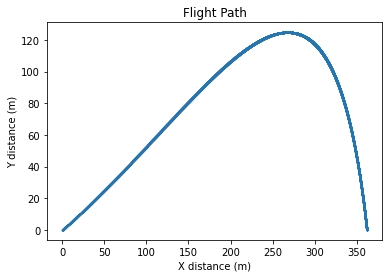

In [62]:
### THIS SECTION FOR SINGLE USE SIMULATOR ###


#MODIFY THESE VALUES
objName = "Baseball"
launchAngle = 25 #degrees
T = -30 #Celsius. Affects air density
alt = 0 #elevation at launch
d = .07 #meters
Cd = .35 #drag coeff. if 0, code will estimate
m = .15 #kg
launchVelocity = 190 # m/s
#END MODIFICATION SECTION


LA = launchAngle* np.pi/180
dt = min(0.01,0.02/launchVelocity) #time step. maximum 10cm distance step at max speed
V = np.array([np.cos(LA),np.sin(LA)])*launchVelocity
Cdrag = getDrag(V,T,alt,d,Cd)
xy,Vs = getPath(V,T,alt,d,Cd,m,dt)
E = list()
for v in Vs:
    E.append(0.5*norm(v)**2*m)
xy= np.array(xy)
plt.scatter(xy[:,0],xy[:,1],s=0.2)
plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.title("Flight Path")
print(objName + " launched at "+str(lA)+ " degrees, " + str(round(launchVelocity,2)) + " m/s")
print("Total distance: "+str(np.round(xy[-1][0],2)) + " m")